<a href="https://colab.research.google.com/github/FiddiCoder/-FIA-Project/blob/main/ml_pipeline/Movie_Recommender_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [ ]:
import os
import tarfile
from six.moves import urllib
#download dataset

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/imdb_top_1000.csv"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "imdb_top_1000.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [ ]:
#load data
datapath = os.path.join("dataset","")
imdb = pd.read_csv(datapath + "imdb_top_1000.csv")

In [ ]:
#prova stampa
imdb.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [ ]:
#download english stopwards (sinossi dei film in inglese)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/stopwords.txt"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "stopwords.txt")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

stopwords = open( datapath + "stopwords.txt")
with open(datapath + "stopwords.txt", "r") as f:
    stopwords = f.read().split("\n")

#Contrariamente all'algoritmo di classificazione, ora sembra esserci il problema inverso: i dati numerici sembrano di poca rilevanza

#Eliminazione colonne con dati numerici (Prova 1)

In [ ]:
imdb = imdb.drop("Gross", axis=1)
imdb = imdb.drop("Released_Year", axis=1)
imdb = imdb.drop("Runtime", axis=1)
imdb = imdb.drop("IMDB_Rating", axis=1)
imdb = imdb.drop("Meta_score", axis=1)
imdb = imdb.drop("No_of_Votes", axis=1)
imdb = imdb.drop("Certificate", axis=1) #stringa che ha scarsa rilevanza

In [ ]:
imdb.head(10)

,Poster_Link,Series_Title,Genre,Overview,Director,Star1,Star2,Star3,Star4
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,"Biography, Drama, History","In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,Drama,An insomniac office worker and a devil-may-car...,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier


In [ ]:
#creazione lista che contiene le parole principali utili all'algoritmo
def crea_lista(row):
    stars = row[["Star1","Star2","Star3","Star4"]].to_list()
    lista = " ".join(row["Series_Title"].split() + row["Genre"].split() + row["Overview"].split() + row["Director"].split() + stars )
    #regex che elimina caratteri inutili
    lista = re.sub(r'[^\w\s]', '', lista)
    #rimozione stopwords
    wordlist = lista.split()
    for word in wordlist:
        if word in stopwords:
            lista = lista.replace(" "+word+" ", " ")

    return lista

In [ ]:
imdb["target"] = imdb.apply(crea_lista, axis=1) # metodo apply di pandas permette di applicare la funzione crea_lista ad ogni riga, creando una nuova colonna nel dataset
print(imdb.loc[0, 'target'])

The Shawshank Redemption Drama Two imprisoned men bond number years finding solace eventual redemption acts common decency Frank Darabont Tim Robbins Morgan Freeman Bob Gunton William Sadler


In [ ]:
#prova jaccard similarity

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

list1 = imdb.loc[0, 'target'].split()

list2 = imdb.loc[1, 'target'].split()
print(list1)
print(list2)
jaccard_similarity(list1, list2)


['The', 'Shawshank', 'Redemption', 'Drama', 'Two', 'imprisoned', 'men', 'bond', 'number', 'years', 'finding', 'solace', 'eventual', 'redemption', 'acts', 'common', 'decency', 'Frank', 'Darabont', 'Tim', 'Robbins', 'Morgan', 'Freeman', 'Bob', 'Gunton', 'William', 'Sadler']
['The', 'Godfather', 'Crime', 'Drama', 'An', 'organized', 'crime', 'dynastys', 'aging', 'patriarch', 'transfers', 'control', 'clandestine', 'empire', 'reluctant', 'son', 'Francis', 'Ford', 'Coppola', 'Marlon', 'Brando', 'Al', 'Pacino', 'James', 'Caan', 'Diane', 'Keaton']


0.038461538461538464

In [ ]:
#applicazione della jaccard similarity tra le tabelle target di un film e i restanti (array monodimensionale)

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

#scelta del film dal quale ottenere i rispettivi film consigliati
id_film = 40
id_film2 = 62   #"La città incantata"
# creazione interfaccia utente
list1 = imdb.loc[id_film, 'target'].split()
list1.extend(imdb.loc[id_film2, 'target'].split())
result_list = np.empty(1000)
#creiamo l'array contente gli id da eliminare nel database sul quale utilizziamo Jaccard
id_film_eliminati = [ id_film , id_film2]

for i in range(1000):
  if((i == id_film) or (i == id_film2)):
    result_list[i] = 0
  else:
    list2 = imdb.loc[i, 'target'].split()
    result_list[i] = jaccard_similarity(list1, list2)
    print(result_list[i])
    print(i)
    print("\n")


In [ ]:
#creazione array contenente i 5 valori più alti ottenuti dalla funzione di jaccard similarity
def Nmaxelements(list1, N):
    final_list = []
    #eliminazione film identità
    # list1 = list1[list1 != 1]

    for i in range(0, N):
        max1 = 0

        for j in range(len(list1)):
            if list1[j] > max1:
                max1 = list1[j];

        print(np.where(list1 == max1))
        list1 = list1[list1 != max1]
        final_list.append(max1)

    print(final_list)
    return(final_list)


final_list = Nmaxelements(result_list, 5)

(array([361]),)
(array([657]),)
(array([435, 583]),)
(array([875]),)
(array([899]),)
[0.08571428571428572, 0.07792207792207792, 0.07692307692307693, 0.0759493670886076, 0.07042253521126761]


In [ ]:
#funzione che mostra il poster del film
def imshow(index):
    url = imdb.loc[index, "Poster_Link"]
    img = Image.open(BytesIO(requests.get(url).content))
    plt.imshow(img)
    plt.show()

Film input:




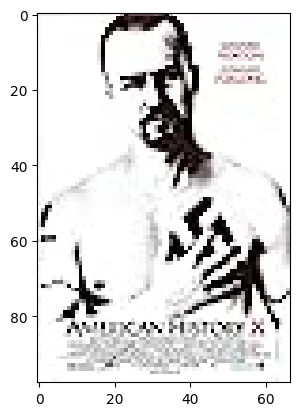



Django Unchained






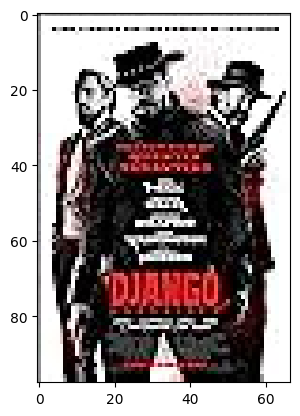



American History X
------------------------------


Film consigliati:




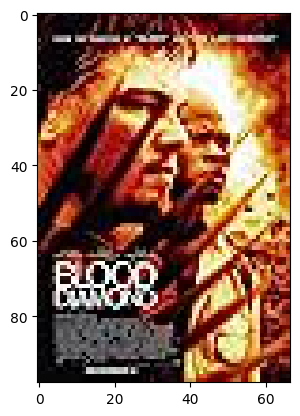



Blood Diamond
------------------------------


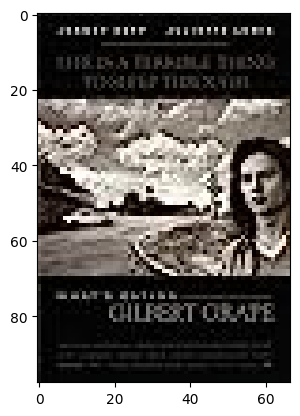



What's Eating Gilbert Grape
------------------------------


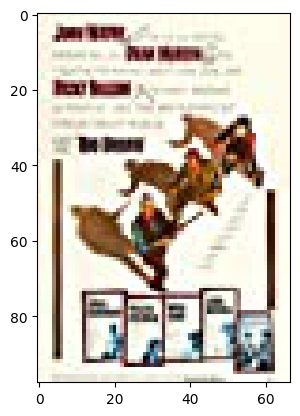



Rio Bravo
------------------------------


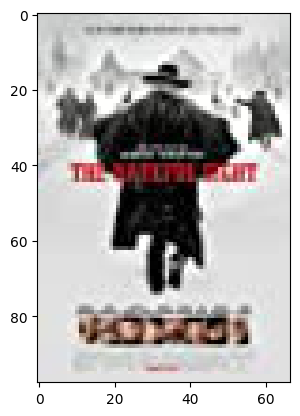



The Hateful Eight
------------------------------


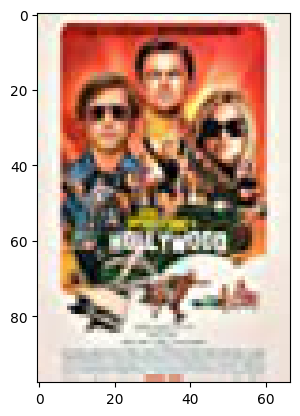



Once Upon a Time... in Hollywood
------------------------------


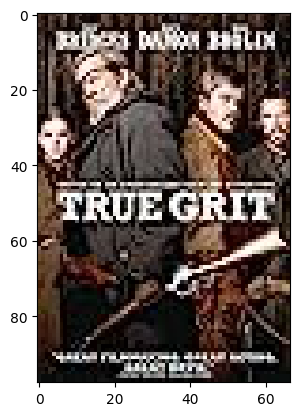



True Grit
------------------------------


In [ ]:
#film scelto
print('Film input:')
print("\n")
imshow(id_film) # I titoli non vengono ancora rimossi dalla ricerca
print("\n")
print(imdb.loc[id_film2].Series_Title)
print("\n")
print("\n")
imshow(id_film2)
print("\n")
print(imdb.loc[id_film].Series_Title)
print('-'*30)
print("\n")
print('Film consigliati:')
print("\n")
#output dei 5 film consigliati rispetto al film dato in input
for i in range(len(final_list)):
  for j in range(len(result_list)):
    if(final_list[i]==result_list[j]):
      imshow(j)
      print("\n")
      print(imdb.loc[j].Series_Title)
      print('-'*30)